# Spotted Python Week 3 Tutorial
In this script, we aim to practice the following skills:
- Manipulating arrays
- Creating functions
- Using logical statements
- Simple demonstration of graphing

In [2]:
# Import libraries
from math import log10, floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colours
import cmasher as cm

## Arrays
Now that we can see some benefit in using arrays, let's try to manipulate them.

In [3]:
# Define some arbitrary arrays
arr1 = np.array([2, 4, 6, 8, 10, 12]) # list of even numbers
arr2 = np.arange(1, 13, 2) # creates an array of odd numbers from 1 to 11
arr3 = np.array([[1,2,3],
                 [4,5,6],
                 [7,8,9]]) # 3x3 array
arr4 = np.array([[2,4,9],
                 [7,1,8],
                 [5,3,6]]) # 3x3 array

In [6]:
arr2

array([ 1,  3,  5,  7,  9, 11])

Again, let's play with these arrays and predict what it will do

In [ ]:
arr3[2,-2] # 3rd to 2nd last value in arr3

8

In [8]:
arr2[:-4] # first to 5th last value in arr2

array([1, 3])

In [9]:
arr3[0] # first list in arr3

array([1, 2, 3])

In [10]:
arr4[:,1] # 2nd column of arr4

array([4, 1, 3])

In [11]:
arr4[2,:] # 3rd row of arr4

array([5, 3, 6])

In [12]:
np.sum(arr1) # sum of all values in arr1

42

In [13]:
np.argmax(arr2) # index of the maximum value in arr2

5

In [14]:
len(arr2) # number of elements in arr2

6

In [15]:
np.size(arr3) # total amount of memory allocated to store arr3

9

In [16]:
np.shape(arr4) # dimensions of arr3

(3, 3)

In [17]:
np.concatenate((arr3,arr4)) # combined list of values from arr3 and arr4

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [2, 4, 9],
       [7, 1, 8],
       [5, 3, 6]])

In [18]:
np.shape(np.concatenate((arr3,arr4)))

(6, 3)

In [19]:
arr3 * arr4 # elementwise multiplication of values in arr3 and arr4

array([[ 2,  8, 27],
       [28,  5, 48],
       [35, 24, 54]])

In [20]:
np.matmul(arr3, arr4) # matrix multiplication between arr3 and arr4

array([[ 31,  15,  43],
       [ 73,  39, 112],
       [115,  63, 181]])

### **Exercise 1:**
Using the defined arrays find the following:
1. Largest number in arr5
2. Index/indices of the smallest number in arr6
3. 5th to 27th values in arr5
4. 13th to 3rd last values in arr6
5. Elementwise sum of the 1st to 15th values of arr5 and arr6
6. Size of arr7
7. Matrix multiplication of arr7 and arr8
8. Combined list of values from arr7 and arr8
9. Elementwise multiplication of arr7 and arr8, as well as the value on the 2nd row and 3rd column from the resulting array.

In [ ]:
# Define arrays
arr5 = np.array([32, 69, 112, 64, 115, 89, 57, 97, 176, 89, 74, 76, 141, 102, 113, 105, 74, 32, 81, 186, 89, 150, 161, 119, 115, 60, 110, 140, 96, 73, 142, 171, 153, 99, 61, 158, 137, 73, 163, 68])
arr6 = np.array([22, 12, 21, 23, 16, 23, 13, 13, 20, 11, 18, 14, 23, 11, 15, 11, 22, 13, 15, 11, 21, 16, 13, 20, 15])
arr7 = np.array([[8, 5, 10, 7], [3, 8, 3, 4], [6, 2, 7, 7], [5, 5, 2, 6]])
arr8 = np.array([[8, 1, 3, 9], [9, 1, 10, 10], [10, 9, 6, 2], [8, 3, 3, 5]])

## Functions
### **Example 1:**
Python makes rounding to significant figures weirdly hard, so let's write a function to round numbers to a given number of significant figures. But before coding up the function, let's figure out the logic.

Assuming we want to round 123456 to 3 significant figures. This is equivalent to rounding the number to the -3rd digit (counting from the decimal place). Hence it is the easiest to first find the order of magnitude of the number:
```python
int(floor(log10(abs(123456)))) # floor rounds to the lower integer
```

Which can be alternatively interpreted as the number of digits before the decimal place to round the number to 1 significant figure. Hence to round the number to the correct number of significant figures, we can add the desired (precision - 1) to the **negative** of the order of magnitude.
```python
sf_to_dp = -int(floor(log10(abs(123456)))) + precision - 1
round(123456, sf_to_dp)
```

In [21]:
# Define the function
def sigfig(x, precision):
    x = float(x) # ensure the number is a float
    precision = int(precision)  # ensure the precision is an integer
    magnitude = int(floor(log10(abs(x))))
    sf_to_dp = -magnitude + precision - 1
    return round(x, sf_to_dp)

In [23]:
sigfig(123456, 3)

123000.0

Opps this is not perfect code, but it is strangely hard to do in python.

### **Example 2:**
Drawing from our example from last week, let's try to generate a function to calculate the escape velocity.

In [24]:
# Defining the function
def escape(M,R): # M and R are the parameteres required
    G = 6.67*10**-11 # gravitational constant
    v_esc = ((2*G*M)/R)**0.5 # calculates the escape velocity, m/s
    return v_esc

In [25]:
# Input parameters
M_earth = 5.97e24 # mass of earth, kg
R_earth = 6.371e6 # radius of earth, m

# Finding the escape velocity
v_esc_sun = escape(M_earth,R_earth)
print(f'The escape velocity for the Sun is {sigfig(v_esc_sun,3)} m/s') # prints the value to 3sf

The escape velocity for the Sun is 11200.0 m/s


### **Exercise 2:**
Write a function for calculating gravitational force between two objects. Then use your function to calculate the gravitational acceleration between the Earth and the Sun. Recall, $$F=\frac{Gm_1m_2}{r^2},$$ where, $m_1$, $m_2$ are the masses of the 2 objects, and $r$ is the distance between the two objects. The distance between the Earth and the Sun is $150.67 \text{ Gm}$.

After learning more things we can do in python, we can then make more complex functions.

## Logical Statements
Sometimes to isolate particular values we want within a long array, we can give ask python logical statements. This allows us to further treat values differently depending on whether they satisfy a condition, using if/else statements.
### **Example 3:**
Determine the Harvard spectral classification for a main-sequence star with an effective temperature of 7800K. Recalling the classifications are as below:
- $\text{O: }T_{eff}\geq33000 \ K$
- $\text{B: }10000\leq T_{eff}<33000 \ K$
- $\text{A: }7300\leq T_{eff}<10000 \ K$
- $\text{F: }6000\leq T_{eff}<7300 \ K$
- $\text{G: }5300\leq T_{eff}<6000 \ K$
- $\text{K: }3900\leq T_{eff}<5300 \ K$
- $\text{M: }2300\leq T_{eff}<3900 \ K$

In [27]:
# we can request an input
temp = float(input('what is the temperature of the main-sequence star? '))

# use logical statements to determine the classification of the star
if temp >= 33000:
    print('O')
elif 10000 <= temp < 33000:
    print('B')
elif 7300 <= temp < 10000:
    print('A')
elif 6000 <= temp < 7300:
    print('F')
elif 5300 <= temp < 6000:
    print('G')
elif 3900 <= temp < 5300:
    print('K')
elif 2300 <= temp < 3900:
    print('M')
else:
    print('not a valid temperature')

not a valid temperature


In [28]:
# We can easily make this into a function
def classify_star(temp):
    if temp >= 33000:
        classify = 'O'
    elif 10000 <= temp < 33000:
        classify = 'B'
    elif 7300 <= temp < 10000:
        classify = 'A'
    elif 6000 <= temp < 7300:
        classify = 'F'
    elif 5300 <= temp < 6000:
        classify = 'G'
    elif 3900 <= temp < 5300:
        classify = 'K'
    elif 2300 <= temp < 3900:
        classify = 'M'
    return classify

In [29]:
classify_star(7800)

'A'

### **Exercise 3:**
Determine the whether a star of mass $M=3.67\times10^{29} \text{ kg}$ is a low-mass, intermediate-mass or massive star. Given:
- $M_\odot=1.989\times10^{30}$
- $\text{Low mass stars: }M/M_{\odot}<=0.08$
- $\text{Intermediate mass stars: } 0.08\leq M/M_{\odot}\lesssim2$
- $\text{Massive stars: } 2\lesssim M/M_{\odot}\lesssim10$

## Simple Graphing
We will import the stellar data and colour the HR diagram in different ways

In [30]:
# import the csv file
# here we put the name of the file as a string
# the delimiter is what separate the different data
# skiprow tells the function how many rows to skip from the start of the file
# dtype sets the type of object being imported
stellar_data = np.loadtxt('stellar_data.csv', delimiter= ',', skiprows=1, dtype=object)

# store each column as a new variable
star_T = stellar_data[:,0].astype(float) # to avoid using temp again, stellar_T is used
star_L = stellar_data[:,1].astype(float) # luminosity in solar luminosity
star_R = stellar_data[:,2].astype(float) # radius in solar radii
star_Mv = stellar_data[:,3].astype(float) # magnitude
star_type = stellar_data[:,4] # type of star
star_colour = stellar_data[:,5] # colour
star_class = stellar_data[:,6] # spectral classification

Text(0, 0.5, '$M_V$, $mag$')

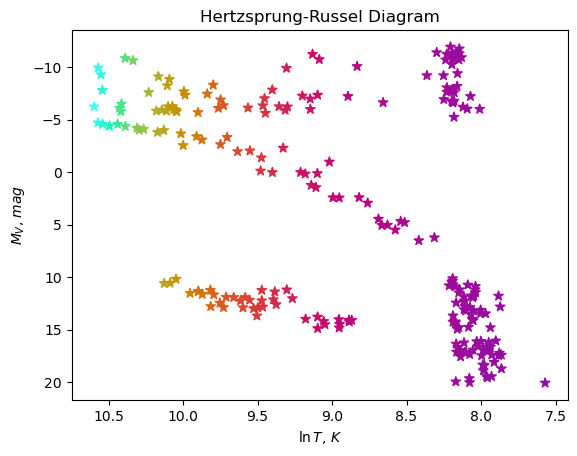

In [31]:
# Create a colourmap
cmap = colours.ListedColormap(['#ff6347', '#fe8951', '#ffa93e', '#ffc728', '#ffe410', '#90b2e8', '#778ce5', '#5d66df', '#403ed7', '#0000cd'])
cmap_2 = cm.tropical

plt.scatter(np.log(star_T), star_Mv, c=star_T, marker='*', s=50, cmap=cmap_2)

# Since the HR diagram has inverted scales
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Axes
plt.title('Hertzsprung-Russel Diagram') # Title of graph
plt.xlabel('$\ln T$, $K$') # x-axis label
plt.ylabel('$M_V$, $mag$') # y-axis label

What if we want to colourcode according to the type of star?

In [32]:
# Let's first make new arrays depending on the type of star

# Brown Dwarf, bd
bd_T = star_T[np.where(star_type == 'Brown Dwarf')]
bd_Mv = star_Mv[np.where(star_type == 'Brown Dwarf')]

# Red Dwarf, rd
rd_T = star_T[np.where(star_type == 'Red Dwarf')]
rd_Mv = star_Mv[np.where(star_type == 'Red Dwarf')]

# White Dwarf
wd_T = star_T[np.where(star_type == 'White Dwarf')]
wd_Mv = star_Mv[np.where(star_type == 'White Dwarf')]

# Main Sequence
ms_T = star_T[np.where(star_type == 'Main Sequence')]
ms_Mv = star_Mv[np.where(star_type == 'Main Sequence')]

# Supergiant
sg_T = star_T[np.where(star_type == 'Supergiant')]
sg_Mv = star_Mv[np.where(star_type == 'Supergiant')]

# Hypergiant
hg_T = star_T[np.where(star_type == 'Hypergiant')]
hg_Mv = star_Mv[np.where(star_type == 'Hypergiant')]

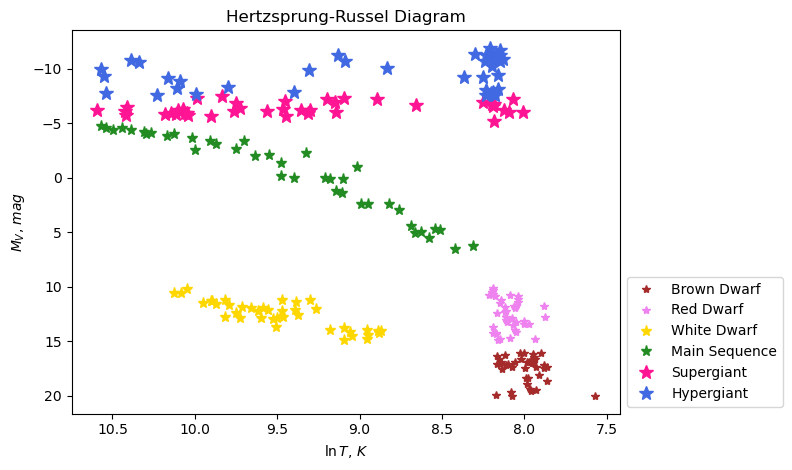

In [33]:
# plot the stars on a diagram
# I prefer logging the values themselves
plt.plot(np.log(bd_T), bd_Mv, '*', markersize=6, color = 'brown', label = 'Brown Dwarf')
plt.plot(np.log(rd_T), rd_Mv, '*', markersize=6, color = 'violet', label = 'Red Dwarf')
plt.plot(np.log(wd_T), wd_Mv, '*', markersize=8, color = 'gold', label = 'White Dwarf')
plt.plot(np.log(ms_T), ms_Mv, '*', markersize=8, color = 'forestgreen', label = 'Main Sequence')
plt.plot(np.log(sg_T), sg_Mv, '*', markersize=10, color = 'deeppink', label = 'Supergiant')
plt.plot(np.log(hg_T), hg_Mv, '*', markersize=10, color = 'royalblue', label = 'Hypergiant')

# Since the HR diagram has inverted scales
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Axes
plt.title('Hertzsprung-Russel Diagram') # Title of graph
plt.xlabel('$\ln T$, $K$') # x-axis label
plt.ylabel('$M_V$, $mag$') # y-axis label

# Legend
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0), loc='lower left') # displays and sets the location